In [1]:
import functions as f
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## Import data and divide train/test groups

In [2]:
df, X, y = f.import_train_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

## Scale data

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [4]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-Nearest Neighbors

### Original data

In [5]:
knn = KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
knn.score(X_test, y_test)

0.6713286713286714

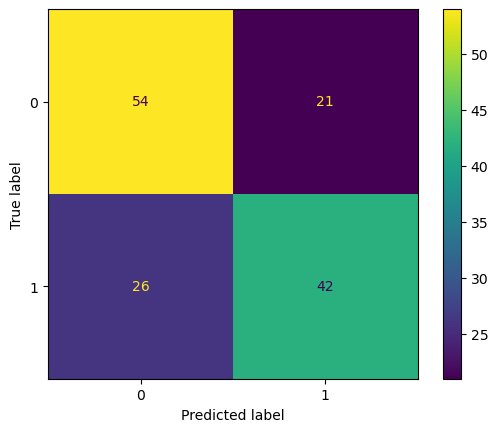

In [8]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Scaled data

In [9]:
knn_scaled = KNeighborsClassifier(n_neighbors=5)

In [10]:
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [11]:
knn_scaled.score(X_test_scaled, y_test)

0.7412587412587412

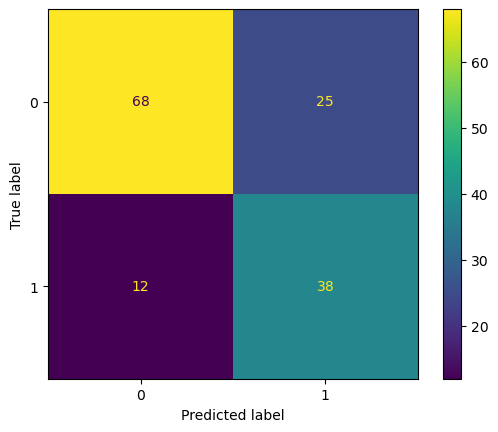

In [12]:
y_pred = knn_scaled.predict(X_test_scaled)
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Predict and export results

In [14]:
test = f.import_clean_test()

In [16]:
f.generate_scaled_results(knn_scaled, scaler, test, 'knn_result1.csv')

## Find, train, and use better KNN model

In [18]:
grid = {"n_neighbors":range(2,20)}

In [21]:
knn_grid = KNeighborsClassifier()

In [22]:
model = GridSearchCV(estimator = knn_grid, param_grid = grid, cv=5)
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 20)})

In [23]:
knn_better = KNeighborsClassifier(n_neighbors=10)

In [24]:
knn_better.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
knn_better.score(X_test_scaled, y_test)

0.7762237762237763

In [26]:
f.generate_scaled_results(knn_better, scaler, test, 'knn_better_result.csv')

## Use model with training data including cabin info

In [2]:
df, X, y = f.import_train_data_withcabins()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [4]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
grid = {"n_neighbors":range(2,20)}

In [6]:
knn_grid = KNeighborsClassifier()

In [7]:
model = GridSearchCV(estimator = knn_grid, param_grid = grid, cv=5)
model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 20)})

In [8]:
knn_better_withcabins = KNeighborsClassifier(n_neighbors=4)

In [9]:
knn_better_withcabins.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
knn_better_withcabins.score(X_test_scaled, y_test)

0.7622377622377622

In [11]:
test_withcabins = f.import_clean_test_withcabins()

In [12]:
f.generate_scaled_results(knn_better_withcabins, scaler, test_withcabins, 'knn_better_result_withcabins.csv')